<a href="https://colab.research.google.com/github/hsallrounder/Cognitive-Analytics-Lab/blob/main/LSTM_Time_Series_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


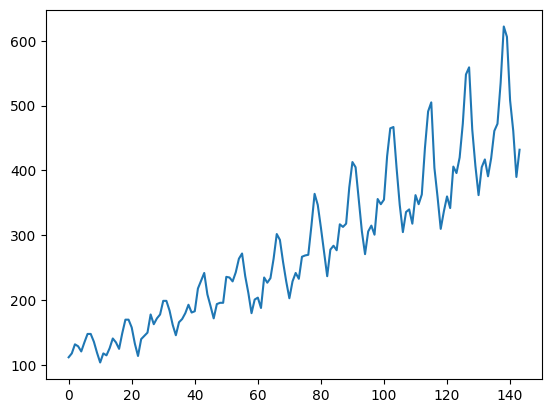

In [3]:
dataset = pandas.read_csv('/content/drive/MyDrive/Datasets/airline-passengers.csv', usecols=[1], engine='python')
plt.plot(dataset)
plt.show()

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [8]:
tf.random.set_seed(7)

In [10]:
dataframe = pd.read_csv('/content/drive/MyDrive/Datasets/airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

In [11]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [12]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


In [14]:
def create_dataset(dataset, look_back=1):
 dataX, dataY = [], []
 for i in range(len(dataset)-look_back-1):
  a = dataset[i:(i+look_back), 0]
  dataX.append(a)
  dataY.append(dataset[i + look_back, 0])
 return np.array(dataX), np.array(dataY)

In [16]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [23]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [24]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
94/94 - 6s - loss: 0.0506 - 6s/epoch - 68ms/step
Epoch 2/100
94/94 - 0s - loss: 0.0253 - 208ms/epoch - 2ms/step
Epoch 3/100
94/94 - 0s - loss: 0.0192 - 238ms/epoch - 3ms/step
Epoch 4/100
94/94 - 0s - loss: 0.0175 - 213ms/epoch - 2ms/step
Epoch 5/100
94/94 - 0s - loss: 0.0163 - 226ms/epoch - 2ms/step
Epoch 6/100
94/94 - 0s - loss: 0.0150 - 228ms/epoch - 2ms/step
Epoch 7/100
94/94 - 0s - loss: 0.0139 - 234ms/epoch - 2ms/step
Epoch 8/100
94/94 - 0s - loss: 0.0128 - 225ms/epoch - 2ms/step
Epoch 9/100
94/94 - 0s - loss: 0.0119 - 226ms/epoch - 2ms/step
Epoch 10/100
94/94 - 0s - loss: 0.0107 - 251ms/epoch - 3ms/step
Epoch 11/100
94/94 - 0s - loss: 0.0097 - 247ms/epoch - 3ms/step
Epoch 12/100
94/94 - 0s - loss: 0.0086 - 224ms/epoch - 2ms/step
Epoch 13/100
94/94 - 0s - loss: 0.0076 - 229ms/epoch - 2ms/step
Epoch 14/100
94/94 - 0s - loss: 0.0067 - 155ms/epoch - 2ms/step
Epoch 15/100
94/94 - 0s - loss: 0.0058 - 157ms/epoch - 2ms/step
Epoch 16/100
94/94 - 0s - loss: 0.0051 - 158ms/epoc

In [25]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

2/2 [==============================] - 0s 6ms/step
Train Score: 22.60 RMSE
Test Score: 51.41 RMSE


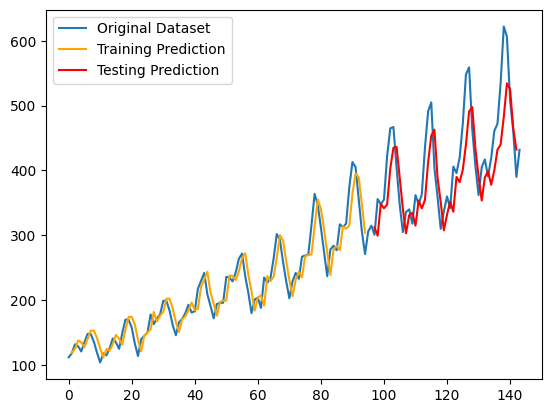

In [34]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset),label='Original Dataset')
plt.plot(trainPredictPlot,color='orange',label='Training Prediction')
plt.plot(testPredictPlot,color='r',label='Testing Prediction')
plt.legend()
plt.show()